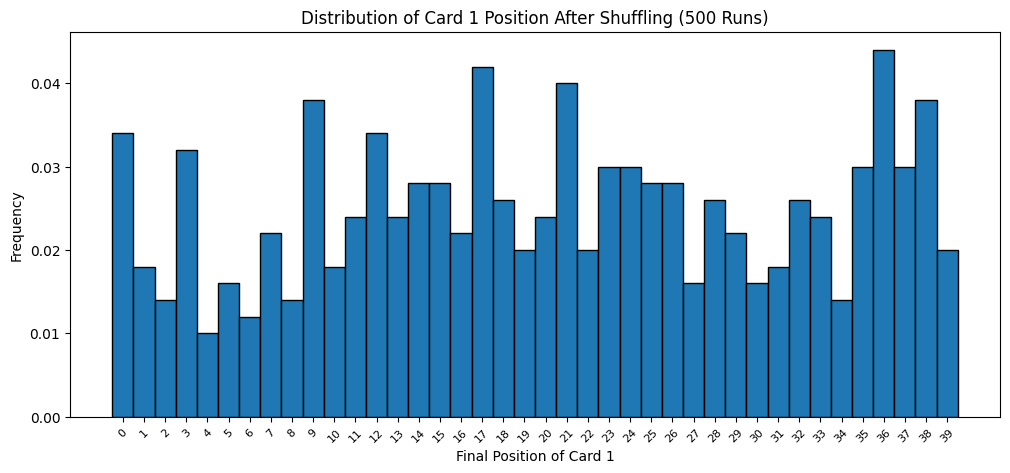

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_partition(deck, mean=20, std_dev=2.5):
    """
    selects a partition of the deck using a Gaussian distribution centered around a mean position.
    """
    while True:
        cut_point = int(np.random.normal(loc=mean, scale=std_dev))
        if 15 <= cut_point <= 25:
            break
    return deck[:cut_point], deck[cut_point:]

def interleave_shuffle(deck, num_splits_range=(2, 4)):
    """
    simulates a shuffle where the second half is split into roughly equal parts and interleaved with the first.
    """
    first_half, second_half = gaussian_partition(deck)
    num_splits = np.random.randint(*num_splits_range + np.array([1, 1]))  # here it splits randomly between 2 and 4 parts

    split_sizes = np.random.multinomial(len(second_half), [1/num_splits] * num_splits)
    shuffled_deck = first_half.copy()

    start = 0
    for size in split_sizes:
        shuffled_deck = np.concatenate((second_half[start:start + size], shuffled_deck))
        start += size

    return shuffled_deck

def shuffle_deck(deck, shuffle_range=(4, 8)):
    """
    repeats the interleave shuffle a random number of times (between 4 and 8).
    """
    num_shuffles = np.random.randint(*shuffle_range + np.array([1, 1]))
    for _ in range(num_shuffles):
        deck = interleave_shuffle(deck)
    return deck

def monte_carlo_simulation(num_simulations, deck_size=40):
    """
    runs the Monte Carlo simulation, tracking the final position of card '1'.
    """
    positions = []
    original_deck = np.arange(1, deck_size + 1)  # deck of cards from 1 to 40

    for _ in range(num_simulations):
        shuffled_deck = shuffle_deck(original_deck)
        positions.append(np.where(shuffled_deck == 1)[0][0])  # find position of card '1'

    return positions

num_simulations = 500
positions = monte_carlo_simulation(num_simulations)


plt.figure(figsize=(12, 5))
plt.hist(positions, bins=np.arange(41) - 0.5, edgecolor='black', density=True)
plt.xlabel('Final Position of Card 1')
plt.ylabel('Frequency')
plt.title(f'Distribution of Card 1 Position After Shuffling ({num_simulations} Runs)')
plt.xticks(range(0, 40), rotation=45, fontsize=8)
plt.show()

In [32]:
from scipy.stats import chisquare

# Compute observed frequencies
observed_counts, _ = np.histogram(positions, bins=np.arange(41) - 0.5)

# Expected frequency per position (assuming uniform distribution)
expected_counts = np.full(40, num_simulations / 40)

# Perform chi-square test
chi2_stat, p_value = chisquare(observed_counts, expected_counts)

print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value > 0.05:
    print("No significant deviation from uniform distribution (shuffle is likely fair).")
else:
    print("Significant deviation from uniform distribution (shuffle may be biased).")


Chi-square statistic: 56.32
P-value: 0.0358
Significant deviation from uniform distribution (shuffle may be biased).


Here we cuould assert that the shuffle may be biased, this is given certain desitions taken in the simulation like a gaussian distribution at the position 20, also making more partitions on the separated second part of the deck would help reduce how biased the shuffling method is.